# Compréhension du jeu de données

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import ravel
import joblib
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

### Fussionner les features et labels

In [18]:
features = pd.read_csv('alt_acsincome_ca_features_85(1).csv')
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')
features.describe()


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
count,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000
mean,42.736235,2.144551,18.470054,2.653633,4019.729279,94.364718,2.506617,37.859255,1.471972,3.071623
std,14.882790,1.888220,3.938362,1.846417,2638.167883,123.472067,4.443905,13.014087,0.499215,2.916045
min,17.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,1.000000,16.000000,1.000000,2014.000000,6.000000,0.000000,32.000000,1.000000,1.000000
50%,42.000000,1.000000,19.000000,1.000000,4110.000000,9.000000,1.000000,40.000000,1.000000,1.000000
75%,55.000000,3.000000,21.000000,5.000000,5521.000000,212.000000,2.000000,40.000000,2.000000,6.000000
max,94.000000,8.000000,24.000000,5.000000,9830.000000,554.000000,17.000000,99.000000,2.000000,9.000000


In [7]:
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')
labels.describe()


,PINCP
count,166315
unique,2
top,False
freq,98112


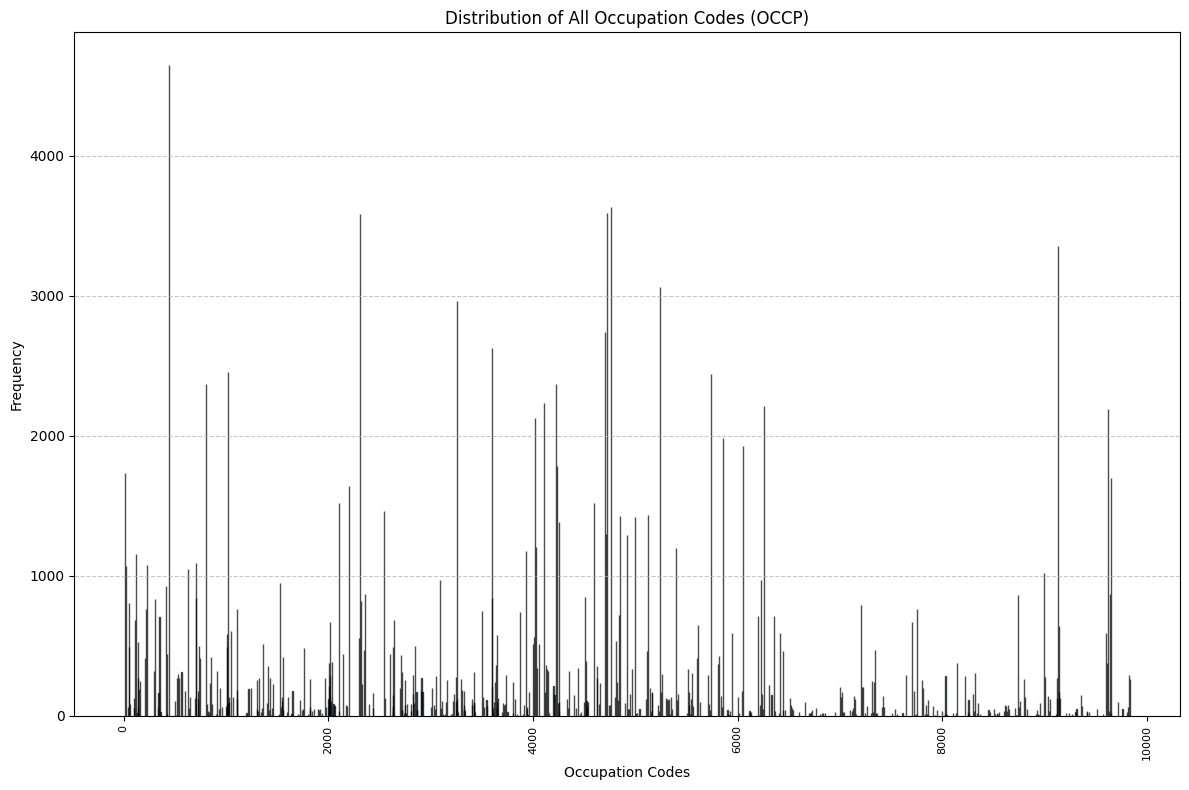

In [8]:
occp_counts = features['OCCP'].value_counts().sort_index()


plt.figure(figsize=(12, 8))
plt.bar(occp_counts.index, occp_counts.values, edgecolor='k', alpha=0.7)
plt.title("Distribution of All Occupation Codes (OCCP)")
plt.xlabel("Occupation Codes")
plt.ylabel("Frequency")
plt.xticks(rotation=90, fontsize=8) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


OCCP
440.0     4651
4760.0    3637
4720.0    3591
2310.0    3588
9130.0    3354
5240.0    3062
3255.0    2963
4700.0    2744
3602.0    2627
1021.0    2456
5740.0    2441
4220.0    2374
800.0     2373
4110.0    2233
6260.0    2212
9620.0    2191
4020.0    2130
5860.0    1988
6050.0    1927
4230.0    1783
Name: count, dtype: int64


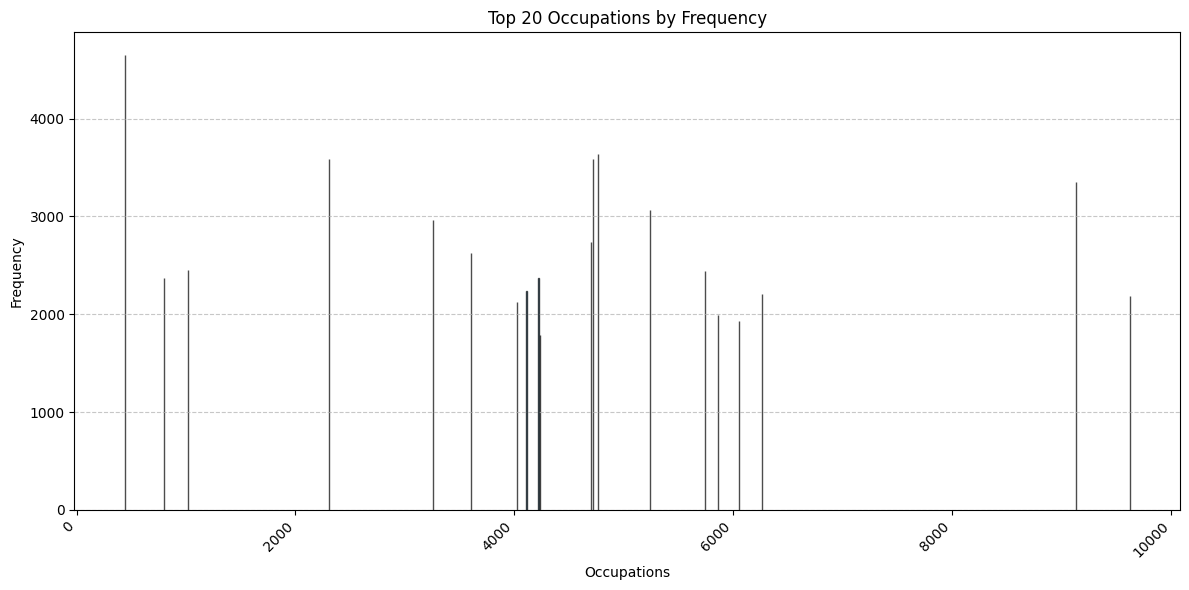

In [14]:
top_occupations = features['OCCP'].value_counts().head(20)
print(top_occupations)

plt.figure(figsize=(12, 6))
plt.bar(top_occupations.index, top_occupations.values, edgecolor='k', alpha=0.7)
plt.title("Top 20 Occupations by Frequency")
plt.xlabel("Occupations")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

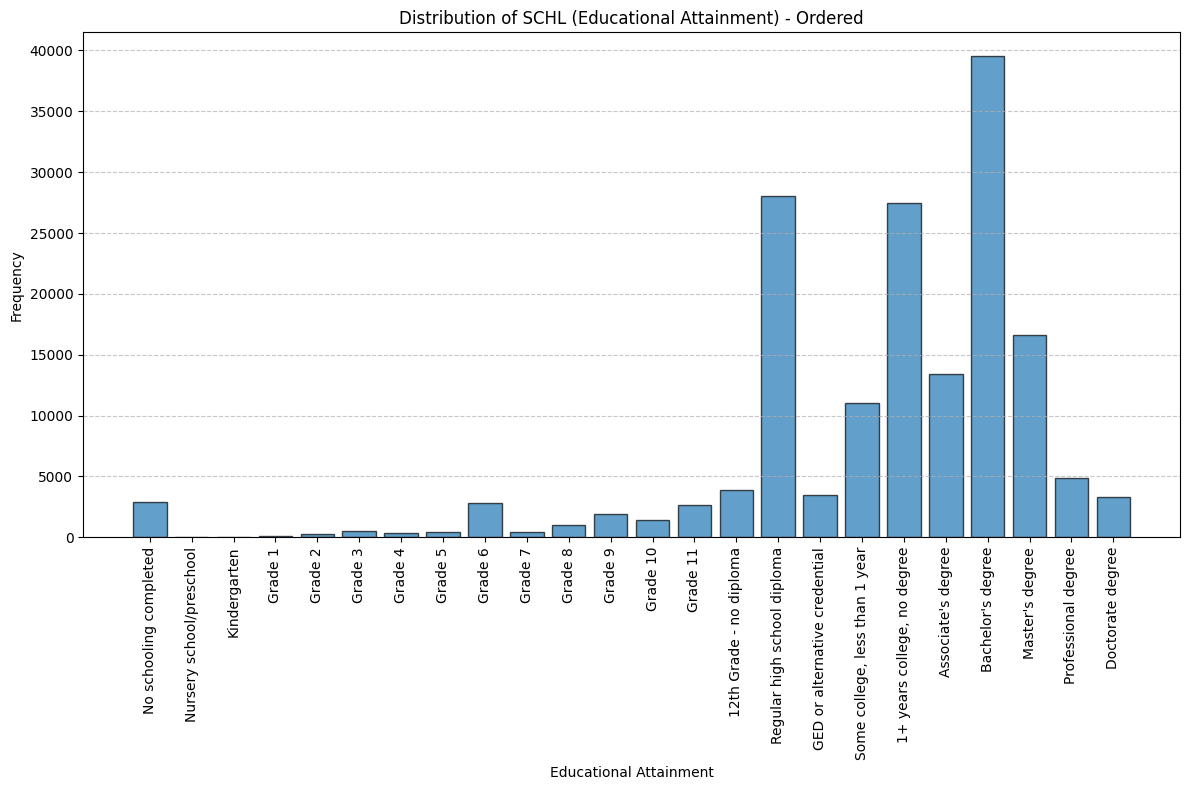

In [15]:
schl_labels = {
    1: "No schooling completed",
    2: "Nursery school/preschool",
    3: "Kindergarten",
    4: "Grade 1",
    5: "Grade 2",
    6: "Grade 3",
    7: "Grade 4",
    8: "Grade 5",
    9: "Grade 6",
    10: "Grade 7",
    11: "Grade 8",
    12: "Grade 9",
    13: "Grade 10",
    14: "Grade 11",
    15: "12th Grade - no diploma",
    16: "Regular high school diploma",
    17: "GED or alternative credential",
    18: "Some college, less than 1 year",
    19: "1+ years college, no degree",
    20: "Associate's degree",
    21: "Bachelor's degree",
    22: "Master's degree",
    23: "Professional degree",
    24: "Doctorate degree"
}


features['SCHL_label'] = features['SCHL'].map(schl_labels)

ordered_labels = list(schl_labels.values()) 
schl_counts = features['SCHL_label'].value_counts().reindex(ordered_labels, fill_value=0)

plt.figure(figsize=(12, 8))
plt.bar(schl_counts.index, schl_counts.values, edgecolor='k', alpha=0.7)
plt.title("Distribution of SCHL (Educational Attainment) - Ordered")
plt.xlabel("Educational Attainment")
plt.ylabel("Frequency")
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Préparer les données 

In [19]:

labels=ravel(labels)
labels.shape

(166315,)

In [ ]:


columns_to_scale = ['AGEP', 'WKHP'] 

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

scaler = StandardScaler()
x_train_scaled = x_train.copy()
x_train_scaled[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test_scaled = x_test.copy()
x_test_scaled[columns_to_scale] = scaler.transform(x_test[columns_to_scale])


print(x_train_scaled.head())
print(x_test_scaled.head())




            AGEP  COW  SCHL  MAR    OCCP  POBP  RELP      WKHP  SEX  RAC1P
76420   0.422488  6.0  21.0  1.0   410.0   6.0   0.0 -2.142223  1.0    1.0
87544  -1.660163  1.0  14.0  5.0  4130.0   6.0  10.0 -1.988332  1.0    1.0
125994 -1.324251  6.0  19.0  5.0  3930.0   6.0   2.0  0.166139  1.0    1.0
159682 -0.585246  1.0  19.0  1.0   220.0   6.0   0.0  0.935594  1.0    1.0
116907 -0.047788  1.0  20.0  1.0  7720.0   6.0  11.0  0.166139  1.0    1.0
            AGEP  COW  SCHL  MAR    OCCP   POBP  RELP      WKHP  SEX  RAC1P
36231   0.086577  1.0  15.0  5.0  4030.0    6.0   2.0 -0.449424  1.0    1.0
141075  0.153759  1.0   6.0  1.0  9640.0  303.0   0.0  0.166139  2.0    8.0
61978  -0.921158  6.0  12.0  5.0  8810.0    6.0  13.0  0.166139  1.0    1.0
67543   0.758400  1.0  21.0  3.0  9620.0    6.0   2.0  0.166139  1.0    6.0
1134    0.758400  1.0  21.0  1.0   440.0  303.0   1.0  0.550866  2.0    1.0


['scaler.joblib']

# Méthode des différents apprentissages 

### RandomForest (les params par défaut) 

In [21]:
rf= RandomForestClassifier()
cv_score= cross_val_score(rf,x_train_scaled,y_train,cv=5,scoring='accuracy')
print("cv score: ",cv_score)

rf.fit(x_train_scaled,y_train)
y_pred= rf.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)
print("classification report")
print(class_report)


cv score:  [0.81372365 0.81387396 0.81055994 0.81270199 0.81232619]
accuracy:  0.8181763521029372
confusion matrix
[[16727  2840]
 [ 3208 10488]]
classification report
              precision    recall  f1-score   support

       False       0.84      0.85      0.85     19567
        True       0.79      0.77      0.78     13696

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263



['AGEP' 'COW' 'SCHL' 'MAR' 'OCCP' 'POBP' 'RELP' 'WKHP' 'SEX' 'RAC1P']


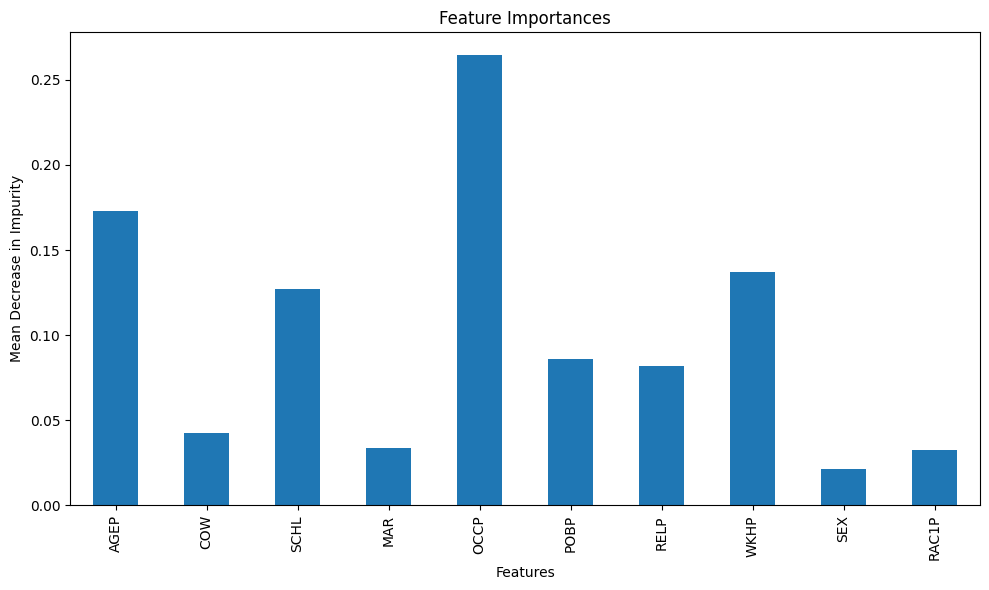

In [10]:

importances= rf.feature_importances_
feature_names= features.columns.values
print(feature_names)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10, 6))  
forest_importances.plot(kind='bar', ax=ax) 
ax.set_title("Feature Importances")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Features")
fig.tight_layout()  
plt.show()

### GridSearchCV for Random Forest

In [ ]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'max_features':["sqrt","log2",4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'random_state': [None, 42]
}
gridSearch=GridSearchCV(estimator=rf,param_grid=param_grid,cv=4, scoring='accuracy',verbose=1)

gridSearch.fit(x_train_scaled,y_train)
print("the best params for Random Forest:", gridSearch.best_params_)
print("the best score for Random Forest:", gridSearch.best_score_)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


/home/yzhang5/5sdbd/tp_super/tp_supervise/tp-supervise/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


the best params for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': None}
the best score for Random Forest: 0.8179057811983285


In [41]:
best_rf= RandomForestClassifier( max_features='sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
best_rf.fit(x_train_scaled,y_train)
y_pred= best_rf.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)


In [25]:
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)
print("classification report")
print(class_report)
joblib.dump(best_rf,'RandomForest_BestModel_08217.joblib')

accuracy:  0.805158885247873
confusion matrix
[[16569  2998]
 [ 3483 10213]]
classification report
              precision    recall  f1-score   support

       False       0.83      0.85      0.84     19567
        True       0.77      0.75      0.76     13696

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.80      0.81      0.80     33263



['RandomForest_BestModel_08217.joblib']

### AdaBoost(paramètre par défaut)

In [24]:
adaBoost= AdaBoostClassifier(algorithm="SAMME")
cv_score= cross_val_score(adaBoost,x_train_scaled,y_train,cv=5,scoring='accuracy').mean()
print("cv score: ",cv_score)
adaBoost.fit(x_train_scaled,y_train)
y_pred= adaBoost.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in versio

cv score:  0.8045876901063664


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


accuracy:  0.805158885247873
confusion matrix
[[16569  2998]
 [ 3483 10213]]


### GridSearchCV for AdaBoost

In [10]:
adaBoost= AdaBoostClassifier(algorithm="SAMME")
param_grid = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.1,0.5,1.0],
    'random_state':[None,42]
}
gridSearch=GridSearchCV(estimator=adaBoost,param_grid=param_grid,cv=4, scoring='accuracy',verbose=1)

gridSearch.fit(x_train_scaled,y_train)
print("the best params for adaBoost:", gridSearch.best_params_)
print("the best score for adaBoost:", gridSearch.best_score_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
the best params for adaBoost: {'learning_rate': 1.0, 'n_estimators': 200, 'random_state': None}
the best score for adaBoost: 0.8098487809277576


In [40]:
best_adaBoost= AdaBoostClassifier(algorithm="SAMME",learning_rate=1.0, n_estimators= 200)
best_adaBoost.fit(x_train_scaled,y_train)
y_pred= best_adaBoost.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)
print("classification report")
print(class_report)


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


accuracy:  0.81002916153083
confusion matrix
[[16588  2979]
 [ 3340 10356]]
classification report
              precision    recall  f1-score   support

       False       0.83      0.85      0.84     19567
        True       0.78      0.76      0.77     13696

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263



In [31]:

joblib.dump(best_rf,'AdaBoost_BestModel_08100.joblib')

['AdaBoost_BestModel_08100.joblib']

### GradientBoosting(paramètre par défaut)

In [29]:
gradientBoosting= GradientBoostingClassifier()
cv_score= cross_val_score(gradientBoosting,x_train_scaled,y_train,cv=5,scoring='accuracy')
print("cv score: ",cv_score)

gradientBoosting.fit(x_train_scaled,y_train)
y_pred= gradientBoosting.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)



cv score:  [0.81364849 0.81612867 0.81397971 0.8149192  0.81563322]
accuracy:  0.8137570273276614
confusion matrix
[[16620  2947]
 [ 3248 10448]]


### GridSearchCV for GradientBoost

In [12]:
gradientBoosting= GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1,0.2,0.5],
    'random_state':[None,42],
    'subsample':[0.8,1.0],
    'max_depth':[3,5,7]
}
gridSearch=GridSearchCV(estimator=gradientBoosting,param_grid=param_grid,cv=4, scoring='accuracy',verbose=1)

gridSearch.fit(x_train_scaled,y_train)
print("the best params for gradientBoost:", gridSearch.best_params_)
print("the best score for gradientBoost:", gridSearch.best_score_)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
the best params for gradientBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'random_state': 42, 'subsample': 1.0}
the best score for gradientBoost: 0.8260905510627423


In [39]:
best_gradientBoosting= GradientBoostingClassifier(learning_rate=0.2, max_depth=7,n_estimators=100, random_state=42, subsample= 1.0)
best_gradientBoosting.fit(x_train_scaled,y_train)
y_pred= best_gradientBoosting.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)
print("classification report")
print(class_report)


accuracy:  0.8287286173826774
confusion matrix
[[16775  2792]
 [ 2905 10791]]
classification report
              precision    recall  f1-score   support

       False       0.85      0.86      0.85     19567
        True       0.79      0.79      0.79     13696

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.83      0.83      0.83     33263



In [33]:
joblib.dump(best_gradientBoosting,'GradientBoosting_BestModel_08287.joblib')

['GradientBoosting_BestModel_08287.joblib']

### Stacking méthode (paramètre par défaut )

In [34]:

estimators = [
    ('ada',AdaBoostClassifier(algorithm='SAMME')),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb',GradientBoostingClassifier(random_state=42))
]

clf=StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

cv_score= cross_val_score(clf,x_train_scaled,y_train,cv=5,scoring='accuracy')
print("cv score: ",cv_score)

clf.fit(x_train_scaled,y_train)
y_pred= clf.predict(x_test_scaled)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in versio

cv score:  [0.81823306 0.81812033 0.81709884 0.81950395 0.81897783]


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in versio

accuracy:  0.8218440910320777
confusion matrix
[[16818  2749]
 [ 3177 10519]]


#### Best parametre for each model

In [36]:
best_rf= RandomForestClassifier( max_features='sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
best_adaBoost= AdaBoostClassifier(algorithm="SAMME",learning_rate=1.0, n_estimators= 200)
best_gradientBoosting= GradientBoostingClassifier(learning_rate=0.2, max_depth=7,n_estimators=100, random_state=42, subsample= 1.0)
estimators = [
    ('ada',best_adaBoost),
    ('rf', best_rf),
    ('gb',best_gradientBoosting)
]

best_staking=clf=StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

best_staking.fit(x_train_scaled,y_train)
y_pred= best_staking.predict(x_test_scaled)
print(best_staking)
accuracy= accuracy_score(y_test,y_pred)
conf_matrix= confusion_matrix(y_test,y_pred)
class_report= classification_report(y_test,y_pred)
print("accuracy: ",accuracy)
print("confusion matrix")
print(conf_matrix)
print("class_report: \n ",class_report)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:514: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in versio

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   n_estimators=200)),
                               ('rf',
                                RandomForestClassifier(min_samples_leaf=2)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           max_depth=7,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())
accuracy:  0.8289390614195954
confusion matrix
[[16848  2719]
 [ 2971 10725]]
class_report: 
                precision    recall  f1-score   support

       False       0.85      0.86      0.86     19567
        True       0.80      0.78      0.79     13696

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg  

In [37]:
joblib.dump(best_staking,'Staking_BestModel_08289.joblib')

['Staking_BestModel_08289.joblib']

# test with other dataset

In [45]:
features_test = pd.read_csv('acsincome_ne_features.csv')
labels_test = pd.read_csv('acsincome_ne_labelTP2.csv')
features_test_scaled = features_test.copy()
features_test_scaled[columns_to_scale] = scaler.transform(features_test[columns_to_scale])

models=[best_rf,best_adaBoost,best_gradientBoosting,best_staking]

for i in models:
    y_pred= i.predict(features_test_scaled)
    print(i)
    accuracy= accuracy_score(labels_test,y_pred)
    conf_matrix= confusion_matrix(labels_test,y_pred)
    class_report= classification_report(labels_test,y_pred)
    print("accuracy: ",accuracy)
    print("confusion matrix")
    print(conf_matrix)
    print("class_report: \n ",class_report)


RandomForestClassifier(min_samples_leaf=2)
accuracy:  0.7588317107093185
confusion matrix
[[5487 1930]
 [ 671 2697]]
class_report: 
                precision    recall  f1-score   support

           0       0.89      0.74      0.81      7417
           1       0.58      0.80      0.67      3368

    accuracy                           0.76     10785
   macro avg       0.74      0.77      0.74     10785
weighted avg       0.79      0.76      0.77     10785

AdaBoostClassifier(algorithm='SAMME', n_estimators=200)
accuracy:  0.7375057950857673
confusion matrix
[[5202 2215]
 [ 616 2752]]
class_report: 
                precision    recall  f1-score   support

           0       0.89      0.70      0.79      7417
           1       0.55      0.82      0.66      3368

    accuracy                           0.74     10785
   macro avg       0.72      0.76      0.72     10785
weighted avg       0.79      0.74      0.75     10785

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, random

In [46]:
features_test = pd.read_csv('acsincome_co_features.csv')
labels_test = pd.read_csv('acsincome_co_label.csv')


features_test_scaled = features_test.copy()
features_test_scaled[columns_to_scale] = scaler.transform(features_test[columns_to_scale])

models=[best_rf,best_adaBoost,best_gradientBoosting,best_staking]
for i in models:
    y_pred= i.predict(features_test_scaled)
    print(i)
    accuracy= accuracy_score(labels_test,y_pred)
    conf_matrix= confusion_matrix(labels_test,y_pred)
    class_report= classification_report(labels_test,y_pred)
    print("accuracy: ",accuracy)
    print("confusion matrix")
    print(conf_matrix)
    print("class_report: \n ",class_report)

RandomForestClassifier(min_samples_leaf=2)
accuracy:  0.7870376285696032
confusion matrix
[[14325  4009]
 [ 2658 10314]]
class_report: 
                precision    recall  f1-score   support

           0       0.84      0.78      0.81     18334
           1       0.72      0.80      0.76     12972

    accuracy                           0.79     31306
   macro avg       0.78      0.79      0.78     31306
weighted avg       0.79      0.79      0.79     31306

AdaBoostClassifier(algorithm='SAMME', n_estimators=200)
accuracy:  0.7766881747907749
confusion matrix
[[13638  4696]
 [ 2295 10677]]
class_report: 
                precision    recall  f1-score   support

           0       0.86      0.74      0.80     18334
           1       0.69      0.82      0.75     12972

    accuracy                           0.78     31306
   macro avg       0.78      0.78      0.77     31306
weighted avg       0.79      0.78      0.78     31306

GradientBoostingClassifier(learning_rate=0.2, max_depth=7